# Úkoly

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

In [63]:
import numpy as np

In [66]:
mat_bool = np.full((3,4), True)
mat_bool

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [67]:
mat_diag = np.diagflat([1,2,3,4], -1)
mat_diag

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

3. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
4. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [68]:
zeros = np.zeros((8,8))
zeros[1:8:2, 0:8:2] = 1
zeros[0:8:2, 1:8:2] = 1
zeros

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

In [69]:
rand_ints = np.random.randint(10,99, 10)
# mask with true/false values, where True are odd numbers.
mask = np.array([True if x % 2 == 1 else False for x in rand_ints])
# -1 * odd numbers only
rand_ints[mask] = -rand_ints[mask]
print(rand_ints)

[ 10 -53  90 -65 -83 -73 -13 -79 -45 -37]


5. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


In [70]:
A = np.random.rand(5,4)
B = np.random.rand(4,5)
print((A @ B).T.all() == (B.T @ A.T).all())

True


6. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ $$(uv)_{ij} = u_iv_j$$ pomocí `newaxis`. Zkontrolujte s `np.outer(u, v)`

In [71]:
u = np.random.randn(3)
v = np.random.randn(4)
print(u,v)
u_col = u[:, np.newaxis]
v_row = v[np.newaxis, :]
print(u_col, v_row)

[ 1.0291198  -0.86295621 -0.55144592] [-0.56946676  1.69928028 -0.90086744 -0.55895617]
[[ 1.0291198 ]
 [-0.86295621]
 [-0.55144592]] [[-0.56946676  1.69928028 -0.90086744 -0.55895617]]


In [73]:
u_size, v_size = 6,6
u,v = np.random.rand(u_size), np.random.rand(v_size)
u_mat, v_mat = u[:, np.newaxis], v[np.newaxis, :]
dyad_soucin = u_mat * v_mat
print(dyad_soucin.all() == np.outer(u,v).all())


True


7. Vytvořte šachovnicovou matici pomocí `tile`.

In [74]:
A = np.array([[0,1], [1,0]])
np.tile(A, (4,4))


array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

# Domácí úkoly
## 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [77]:
A = integer_spiral(3)
print(A)

[[3. 2. 9.]
 [4. 1. 8.]
 [5. 6. 7.]]


In [78]:
def integer_spiral_numpy(n):
    # our matrix
    A = np.zeros((n,n))
    # numbers I will be inserting in matrix
    numbers = np.array([x+1 for x in np.arange(n**2)])
    index_numbers = 0
    # starting indexes
    start_row, start_col = n//2, n//2
    # one in the middle
    A[n//2, n//2] = 1
    #slice length, each cirle's edge length
    slice_lenght = 0

    for i in range(n//2):
        # move the starting index into the left corner of our current circle
        start_row -= 1
        start_col -= 1
        slice_lenght += 2

        # start_row and start_col is the top left corner of each circle. From this index I count the indexes in the matrix. Slice length is +2 every iteration. Next_index is the index in the numbers array, so I know which elements to put in matrix
        A[start_row, start_col:start_col + slice_lenght] = numbers[index_numbers + slice_lenght : index_numbers:-1]
        # move next index, so we can insert next numbers
        next_index = index_numbers + slice_lenght + 1
        A[start_row + 1 : start_row + 1 + slice_lenght, start_col] = numbers[next_index:next_index + slice_lenght]
        next_index += slice_lenght
        A[start_row + slice_lenght, start_col + 1: start_col + 1 + slice_lenght] = numbers[next_index:next_index + slice_lenght]
        next_index += slice_lenght
        A[start_row:start_row + slice_lenght, start_col + slice_lenght] = numbers[next_index + slice_lenght - 1:next_index - 1 :-1]

        index_numbers = next_index + slice_lenght - 1

    return A


In [79]:
print(integer_spiral_numpy(13))

[[133. 132. 131. 130. 129. 128. 127. 126. 125. 124. 123. 122. 169.]
 [134.  91.  90.  89.  88.  87.  86.  85.  84.  83.  82. 121. 168.]
 [135.  92.  57.  56.  55.  54.  53.  52.  51.  50.  81. 120. 167.]
 [136.  93.  58.  31.  30.  29.  28.  27.  26.  49.  80. 119. 166.]
 [137.  94.  59.  32.  13.  12.  11.  10.  25.  48.  79. 118. 165.]
 [138.  95.  60.  33.  14.   3.   2.   9.  24.  47.  78. 117. 164.]
 [139.  96.  61.  34.  15.   4.   1.   8.  23.  46.  77. 116. 163.]
 [140.  97.  62.  35.  16.   5.   6.   7.  22.  45.  76. 115. 162.]
 [141.  98.  63.  36.  17.  18.  19.  20.  21.  44.  75. 114. 161.]
 [142.  99.  64.  37.  38.  39.  40.  41.  42.  43.  74. 113. 160.]
 [143. 100.  65.  66.  67.  68.  69.  70.  71.  72.  73. 112. 159.]
 [144. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 158.]
 [145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157.]]


In [80]:
%timeit integer_spiral_numpy(21)

76.7 µs ± 935 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [81]:
%timeit integer_spiral(21)

309 µs ± 3.23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
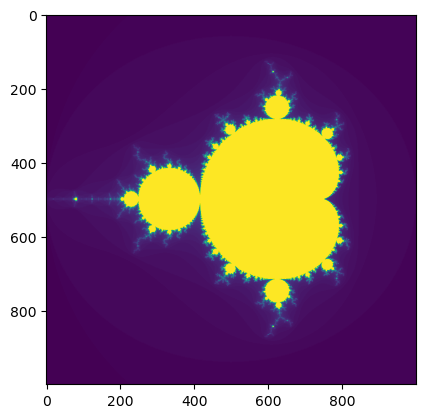

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [82]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x,y)
    # complex numbers
    c = X + 1j * Y
    # z_0
    z = 0

    divergence_matrix = np.empty(c.shape)
    for i in range(k):
        z = z**2 + c
        maska = abs(z) < 2
        divergence_matrix[maska] = i
    return divergence_matrix



C:\Users\Dano\AppData\Local\Temp\ipykernel_12836\1459079132.py:12: RuntimeWarning: overflow encountered in square
  z = z**2 + c
C:\Users\Dano\AppData\Local\Temp\ipykernel_12836\1459079132.py:12: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
C:\Users\Dano\AppData\Local\Temp\ipykernel_12836\1459079132.py:13: RuntimeWarning: overflow encountered in absolute
  maska = abs(z) < 2


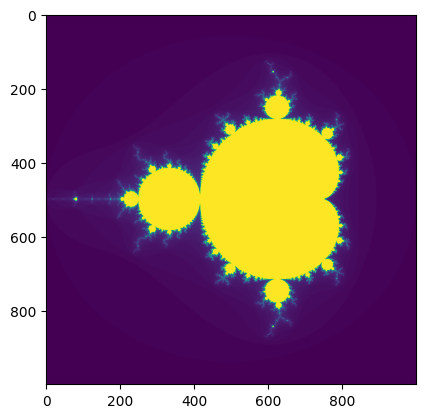

In [83]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

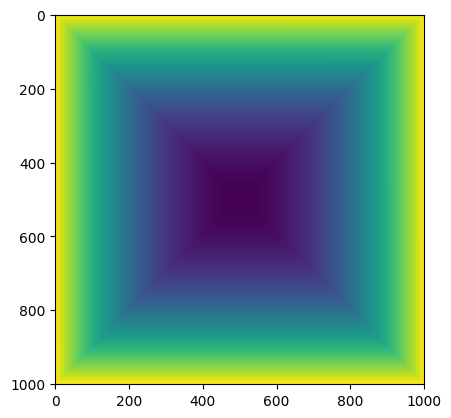

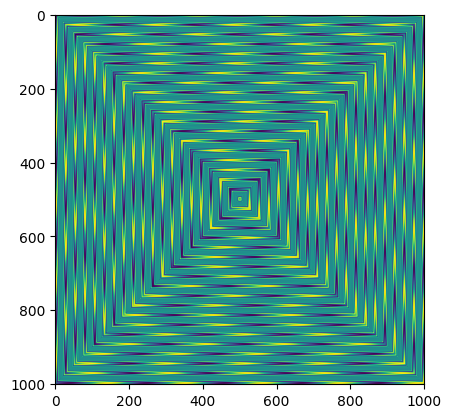

In [89]:
A = integer_spiral(1001)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))

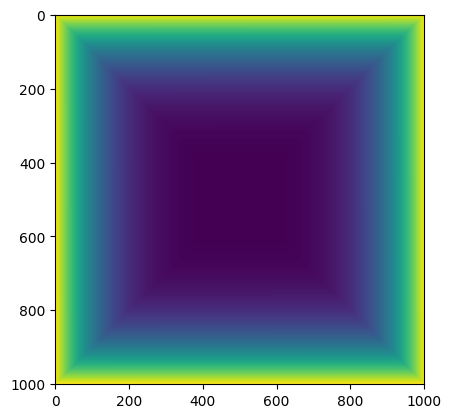

In [97]:
plt.imshow((A*A))

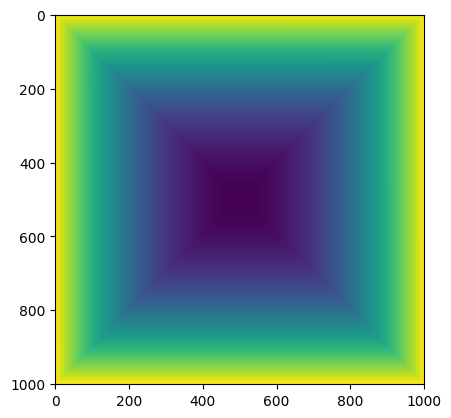

In [98]:
plt.imshow((A * np.exp(0.5)))

In [99]:
# I will use the Wilson's Theorem from Number Theory to see, if a number is prime. I will loop until I get desired number of prime numbers
def find_n_primes(n):
    primes = []
    for p in range(2,10000):
        if np.math.factorial(p-1) % p == p - 1:
            primes.append(p)
        if len(primes) >= n:
            print(f"Found {n} prime numbers using Wilson's theorem")
            return primes

    print(f"Found only {len(primes)} prime numbers.")
    return primes

In [100]:
def primes_spiral_numpy(n):
    # our matrix
    A = np.zeros((n,n))
    # numbers I will be inserting in matrix
    numbers = np.array(find_n_primes(n**2))
    index_numbers = 0
    # starting indexes
    start_row, start_col = n//2, n//2
    # one in the middle
    A[n//2, n//2] = numbers[0]
    #slice length, each cirle's edge length
    slice_lenght = 0

    for i in range(n//2):
        # move the starting index into the left corner of our current circle
        start_row -= 1
        start_col -= 1
        slice_lenght += 2

        # start_row and start_col is the top left corner of each circle. From this index I count the indexes in the matrix. Slice length is +2 every iteration. Next_index is the index in the numbers array, so I know which elements to put in matrix
        A[start_row, start_col:start_col + slice_lenght] = numbers[index_numbers + slice_lenght : index_numbers:-1]
        # move next index, so we can insert next numbers
        next_index = index_numbers + slice_lenght + 1
        A[start_row + 1 : start_row + 1 + slice_lenght, start_col] = numbers[next_index:next_index + slice_lenght]
        next_index += slice_lenght
        A[start_row + slice_lenght, start_col + 1: start_col + 1 + slice_lenght] = numbers[next_index:next_index + slice_lenght]
        next_index += slice_lenght
        A[start_row:start_row + slice_lenght, start_col + slice_lenght] = numbers[next_index + slice_lenght - 1:next_index - 1 :-1]

        index_numbers = next_index + slice_lenght - 1

    return A


In [101]:
print(primes_spiral_numpy(5))

Found 25 prime numbers using Wilson's theorem
[[41. 37. 31. 29. 97.]
 [43.  5.  3. 23. 89.]
 [47.  7.  2. 19. 83.]
 [53. 11. 13. 17. 79.]
 [59. 61. 67. 71. 73.]]


Found 361 prime numbers using Wilson's theorem


<Figure size 640x480 with 0 Axes>

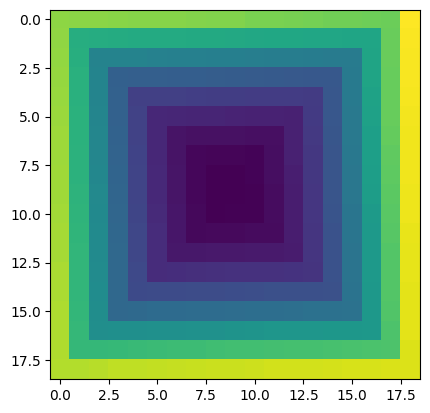

<Figure size 640x480 with 0 Axes>

In [102]:
A = primes_spiral_numpy(19)
plt.imshow(A)
# new figure
plt.figure()